In [1]:
%matplotlib inline

import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import tldextract
import networkx as nx

from networkx.algorithms import bipartite


In [3]:
df = pd.read_csv("../data/author_network_manually_labeled.tsv", delimiter="\t", header=None)
df.columns = ["tld", "author"]

In [21]:
len(set(df.tld))

152

In [4]:
g = nx.Graph()

tlds = set()
authors = set()
for idx, row in df.iterrows():
    tld = row["tld"]
    author = row["author"]
    
    if ( len(author) < 2 ):
        continue
        
    tlds.add(tld)
    authors.add(author)
    g.add_edge(tld, author, weight=1.0)

In [5]:
len(g.nodes), len(g.edges), len(authors)

(5118, 6387, 4966)

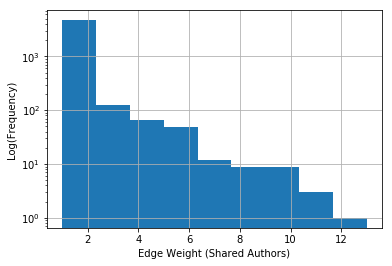

(array([4.691e+03, 1.270e+02, 6.500e+01, 4.900e+01, 1.200e+01, 9.000e+00,
       9.000e+00, 3.000e+00, 1.000e+00]), array([ 1.        ,  2.33333333,  3.66666667,  5.        ,  6.33333333,
        7.66666667,  9.        , 10.33333333, 11.66666667, 13.        ]), <a list of 9 Patch objects>)


In [7]:
degree_map = g.degree()
weights = [degree_map(x) for x in authors]

fig, ax = plt.subplots()

# ax.hist(weights, bins=[2**x for x in range(1,10)])
m = ax.hist(weights, bins=9)

# ax.set_xscale('log')
ax.set_yscale('log')

ax.grid()
ax.set_xlabel("Edge Weight (Shared Authors)")
ax.set_ylabel("Log(Frequency)")

plt.show()

print(m)

In [8]:
sum(np.array(weights) == 1)

4188

In [9]:
np.mean([degree_map(x) for x in tlds])

42.01973684210526

In [10]:
proj_tld_g = bipartite.weighted_projected_graph(g, tlds)
nx.write_graphml(proj_tld_g, "website_tld_projection.graphml")

In [25]:
len(proj_tld_g.nodes()), len(proj_tld_g.edges())

(152, 427)

In [29]:
connected_tld = len([x for x,y in proj_tld_g.degree() if y > 0])
print("Number of Connected TLDs:", connected_tld)

Number of Connected TLDs: 76


In [35]:
nx.density(proj_tld_g)

0.03720808644126874

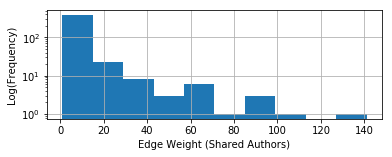

(array([382.,  22.,   8.,   3.,   6.,   1.,   3.,   1.,   0.,   1.]), array([  1.,  15.,  29.,  43.,  57.,  71.,  85.,  99., 113., 127., 141.]), <a list of 10 Patch objects>)


In [19]:
fig = plt.figure(figsize=(6,2))
ax = fig.add_subplot(1,1,1)

weights = [x[2]["weight"] for x in proj_tld_g.edges(data=True)]

m = ax.hist(weights, bins=10)

# ax.set_xscale('log')
ax.set_yscale('log')

ax.grid()
ax.set_xlabel("Edge Weight (Shared Authors)")
ax.set_ylabel("Log(Frequency)")

plt.savefig("shared_author_hist.pdf", format="pdf", bbox_inches="tight")
plt.show()

print(m)

In [23]:
sum(np.array(weights) >= 5)

126

In [31]:
proj_auth_g = bipartite.weighted_projected_graph(g, authors)
nx.write_graphml(proj_auth_g, "website_author_projection.graphml")

In [32]:
len(proj_auth_g.nodes()), len(proj_auth_g.edges())

(4966, 1924813)

In [33]:
connected_authors = len([x for x,y in proj_auth_g.degree() if y > 0])
print("Number of Connected Authors:", connected_authors)

Number of Connected Authors: 4929


In [36]:
nx.density(proj_auth_g)

0.15613223292000913

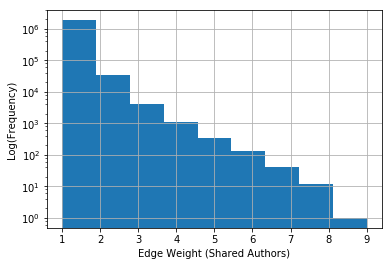

(array([1.884618e+06, 3.449500e+04, 4.062000e+03, 1.098000e+03,
       3.560000e+02, 1.290000e+02, 4.200000e+01, 1.200000e+01,
       1.000000e+00]), array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
       5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]), <a list of 9 Patch objects>)


In [149]:
weights = [x[2]["weight"] for x in proj_auth_g.edges(data=True)]

fig, ax = plt.subplots()

# ax.hist(weights, bins=[2**x for x in range(1,10)])
m = ax.hist(weights, bins=9)

# ax.set_xscale('log')
ax.set_yscale('log')

ax.grid()
ax.set_xlabel("Edge Weight (Shared Authors)")
ax.set_ylabel("Log(Frequency)")

plt.show()

print(m)

In [151]:
sum(np.array(weights) ==1)

1884618

In [114]:
centrality = nx.centrality.eigenvector_centrality_numpy(proj_auth_g)

In [115]:
sorted_centrality = sorted(centrality, key=centrality.get, reverse=True)
for u in sorted_centrality[:10]:
    print(u, centrality[u])

christinasarich 0.02745415333460647
clairebernish 0.027416897919906383
kurtnimmo 0.027403414602089896
jonrappoport 0.027375828027001843
justingardner 0.027371967426197436
brandonturbeville 0.027363536268536326
tonycartalucci 0.027333430738529563
michaelsnyder 0.02732679468171092
mattagorist 0.027311957728862364
careywedler 0.027306258636534447


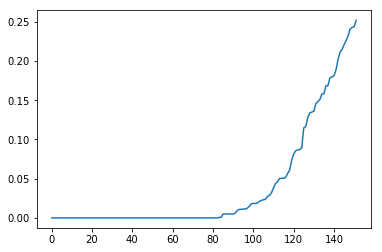

In [109]:
plt.plot(sorted(centrality.values()))

In [113]:
proj_tld_g.get_edge_data("themillenniumreport.com", "theeventchronicle.com")

{'weight': 95}

In [167]:
for x in g.neighbors("jonrappoport"):
    print(x)

21stcenturywire.com
abeldanger.net
activistpost.com
dcclothesline.com
globalresearch.ca
intellihub.com
jamesfetzer.blogspot.com
scoopfeed.net
sgtreport.com
theeventchronicle.com
themillenniumreport.com
